# Data-X Spring 2018: Homework 02

### Regression, Classification, Webscraping

**Authors:** Sana Iqbal (Part 1, 2, 3), Alexander Fred-Ojala (Extra Credit)


In this homework, you will do some exercises with prediction-classification, regression and web-scraping.


## Part 1


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1:Read the data file in python. Describe data features in terms of type, distribution range and mean values. Plot feature distributions.This step should give you clues about data sufficiency.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Energy.csv')
print (df.dtypes)
df.describe()
df.info()

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


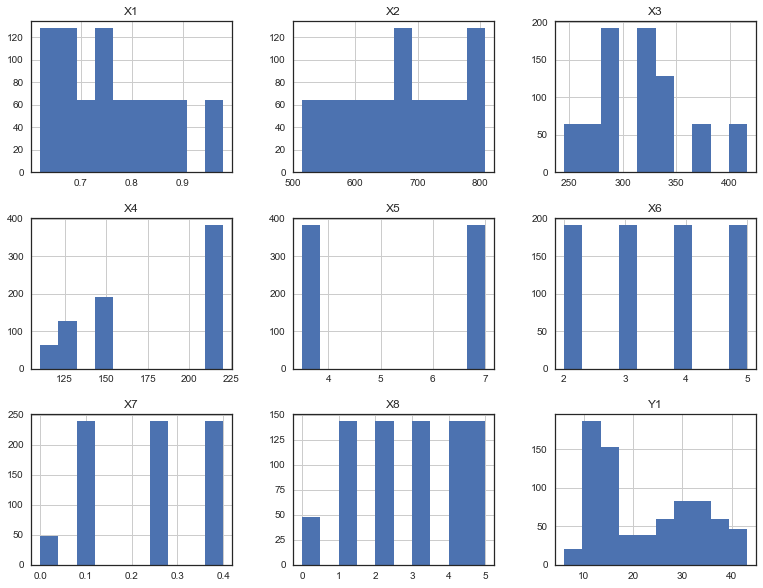

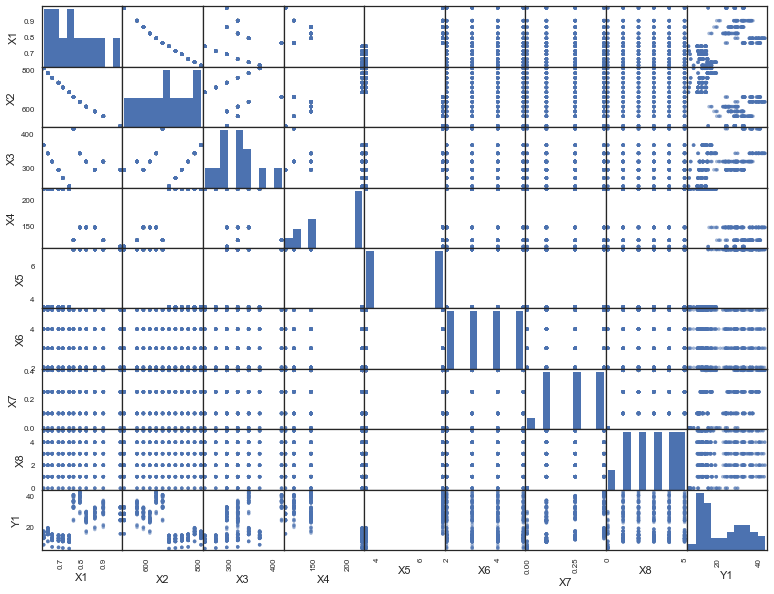

In [4]:
sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 10 , 6
df.hist(figsize=(13,10))
plt.show()
pd.tools.plotting.scatter_matrix(df,figsize=(13,10));


 __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.  

__Q2.1: Train a linear regression model on 85 percent of the given dataset, what is the intercept value and coefficient values.__



In [6]:
X = df.drop('Y1', axis=1)
y = df[['Y1']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

print ("Coefficient values : " , regression_model.coef_[0])
print ("intercept value : " , regression_model.intercept_[0])

Coefficient values :  [ -6.63637914e+01  -6.09978768e-02   3.30257405e-02  -4.70118086e-02
   4.43531215e+00   5.05798971e-02   1.97548528e+01   2.15548010e-01]
intercept value :  83.1885911371


In [7]:
training_accuracy=regression_model.score(X_train,y_train)
print ('Training Accuracy:',training_accuracy)

testing_accuracy=regression_model.score(X_test,y_test)
print ('Testing Accuracy:',testing_accuracy)

Training Accuracy: 0.918292305425
Testing Accuracy: 0.900390751585



#### Q.2.2: Report model performance using 'ROOT MEAN SQUARE' error metric on:  
__1. Data that was used for training(Training error)__   
__2. On the 15 percent of unseen data (test error) __ 



In [8]:
import math
from sklearn.metrics import mean_squared_error

y_predict_train = regression_model.predict(X_train)
regression_model_mse_train = mean_squared_error(y_predict_train, y_train)
print ("RMS error on train data is" , math.sqrt(regression_model_mse_train))

y_predict_test = regression_model.predict(X_test)
regression_model_mse_test = mean_squared_error(y_predict_test, y_test)
print ("RMS error on test data is" , math.sqrt(regression_model_mse_test))

RMS error on train data is 2.8974386948222253
RMS error on test data is 3.07665642041752



__ Q2.3: Lets us see the effect of amount of data on the performance of prediction model.Use varying amounts of  Training data (100,200,300,400,500,all) to train regression models and report  training error and validation error in each case. Validation data/Test data   is the same as above for  all  these cases.__  

Plot error rates vs number of training examples.Comment on the relationshipyou observe in the plot, between the amount of data used to train the model and the validation accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

In [9]:
list1 = [100,200,300,400,500,767]
for i in list1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = i, random_state=1)

    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    y_predict_train = regression_model.predict(X_train)
    regression_model_mse_train = mean_squared_error(y_predict_train, y_train)
    print ("RMS error on", i , "train data is : " , math.sqrt(regression_model_mse_train))

    y_predict_test = regression_model.predict(X_test)
    regression_model_mse_test = mean_squared_error(y_predict_test, y_test)
    print ("RMS error on", 767-i ,"test data is : " , math.sqrt(regression_model_mse_test))
    print ("")

RMS error on 100 train data is :  2.5864735337397806
RMS error on 667 test data is :  3.130786183258492

RMS error on 200 train data is :  2.8182155488376943
RMS error on 567 test data is :  2.981500396493787

RMS error on 300 train data is :  2.776469819600534
RMS error on 467 test data is :  3.0544046977708326

RMS error on 400 train data is :  2.7832000465846622
RMS error on 367 test data is :  3.0760032034568865

RMS error on 500 train data is :  2.7560364234699035
RMS error on 267 test data is :  3.216935382391416

RMS error on 767 train data is :  2.9259806327895714
RMS error on 0 test data is :  0.4546740547588062




__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance. You can also output the probabilities of an instance belnging to a class.  

__ Q 3.1:  Bucket values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:__ 

0: 'Low' ( < 15),   
1: 'Medium'  (15-30),   
2: 'High'  (>30)

This converts the given dataset  into a classification problem, classes being, Heating load is: *low, medium or high*. Use this datset with transformed 'heating load' for creating a  logistic regression classifiction model that predicts heating load type of a building. Use test-train split ratio of 0.15.  

*Report training and test accuracies and  confusion matrices.*


**HINT:** Use pandas.cut

In [10]:
df['Y1B'] = pd.cut(df['Y1'],[0,15,30,np.inf],right=True,labels=[0,1,2])
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y1B
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,1
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,1
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,1
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,1


__ Q3.2: One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. This makes training less sensitive to the scale of features . Scaling is important in algorithms that use distance based classification, SVM or K means or involve gradient descent optimization.If we  Scale features in the range [0,1] it is called unity based normalization.__

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [11]:
from sklearn import preprocessing
normalized = np.round(preprocessing.normalize(df, norm='l1') , 2)

X = df.drop('Y1', axis=1)
y = df[['Y1']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_predict_train = regression_model.predict(X_train)
regression_model_mse_train = mean_squared_error(y_predict_train, y_train)
print ("RMS error on train data is" , math.sqrt(regression_model_mse_train))

y_predict_test = regression_model.predict(X_test)
regression_model_mse_test = mean_squared_error(y_predict_test, y_test)
print ("RMS error on test data is" , math.sqrt(regression_model_mse_test))

training_accuracy=regression_model.score(X_train,y_train)
print ('Training Accuracy:', (training_accuracy)*100 , '%')

testing_accuracy=regression_model.score(X_test,y_test)
print ('Testing Accuracy:',(testing_accuracy)*100 , '%' )

RMS error on train data is 2.3287159431098976
RMS error on test data is 2.2994927435922357
Training Accuracy: 94.7220231827 %
Testing Accuracy: 94.4357613303 %


## Part 2



__ 1. Read __`diabetesdata.csv`__ file into a pandas dataframe. Analyze the data features, check for NaN values. 
About the data: __

1. __TimesPregnant__: Number of times pregnant 
2. __glucoseLevel__: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. __BP__: Diastolic blood pressure (mm Hg)  
5. __insulin__: 2-Hour serum insulin (mu U/ml) 
6. __BMI__: Body mass index (weight in kg/(height in m)^2) 
7. __pedigree__: Diabetes pedigree function 
8. __Age__: Age (years) 
9. __IsDiabetic__: 0 if not diabetic or 1 if diabetic) 

__ 2. Preprocess data to replace NaN values in a feature(if any) using mean of the feature.  
Train  logistic regression, SVM, perceptron, kNN, xgboost and random forest models using this preprocessed data with 20% test split.Report training and test accuracies.__







In [12]:
df = pd.read_csv('diabetesdata.csv')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
import xgboost as xgb

C:\Users\DELL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
print(df.isnull().sum())

TimesPregnant     0
glucoseLevel     34
BP                0
insulin           0
BMI               0
Pedigree          0
Age              33
IsDiabetic        0
dtype: int64


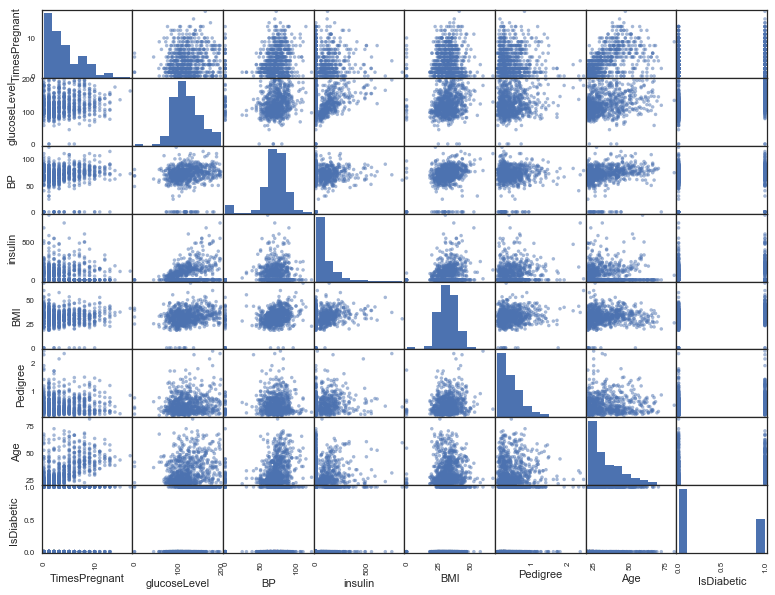

In [14]:
pd.tools.plotting.scatter_matrix(df,figsize=(13,10));

In [15]:
df['Age'].fillna(df['Age'].dropna().mean(), inplace=True)
df['glucoseLevel'].fillna(df['glucoseLevel'].dropna().mean(), inplace=True)
df.isnull().sum()

TimesPregnant    0
glucoseLevel     0
BP               0
insulin          0
BMI              0
Pedigree         0
Age              0
IsDiabetic       0
dtype: int64

In [16]:
X = df.drop('IsDiabetic', axis=1)
y = df[['IsDiabetic']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
#Logistic Regression

logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 

acc_log_test = (logreg.score(X_test, y_test))
acc_log_train = (logreg.score(X_train, y_train))

print ("Accuracy for Logistic Regression training is :" , round(acc_log_train,2)*100 , "%")
print ("Accuracy for Logistic Regression testing is :" , round(acc_log_test,2)*100 , "%")

Accuracy for Logistic Regression training is : 76.0 %
Accuracy for Logistic Regression testing is : 77.0 %


In [18]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)

acc_svc_test = svc.score(X_test, y_test)
acc_svc_train = svc.score(X_train, y_train)

print ("Accuracy for SVM training is :" , round(acc_svc_train,2)*100 , "%")
print ("Accuracy for SVM testing is :" , round(acc_svc_test,2)*100 , "%")

Accuracy for SVM training is : 100.0 %
Accuracy for SVM testing is : 64.0 %


In [19]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

acc_knn_train = knn.score(X_train, y_train)
acc_knn_test = knn.score(X_test, y_test)

print ("Accuracy for KNN training is :" , round(acc_knn_train,2)*100 , "%")
print ("Accuracy for KNN testing is :" , round(acc_knn_test,2)*100 , "%")

Accuracy for KNN training is : 84.0 %
Accuracy for KNN testing is : 75.0 %


In [23]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

acc_perceptron_train = perceptron.score(X_train, y_train)
acc_perceptron_test = perceptron.score(X_test, y_test)

print ("Accuracy for Perceptron training is :" , round(acc_perceptron_train,2)*100 , "%")
print ("Accuracy for Perceptron testing is :" , round(acc_perceptron_test,2)*100 , "%")

Accuracy for Perceptron training is : 65.0 %
Accuracy for Perceptron testing is : 62.0 %


In [24]:
# XGBoost

gradboost = xgb.XGBClassifier(n_estimators=1000)
gradboost.fit(X_train, y_train)

acc_XGB_train = gradboost.score(X_train, y_train)
acc_XGB_test = gradboost.score(X_test, y_test)

print ("Accuracy for XGB training is :" , round(acc_XGB_train,2)*100 , "%")
print ("Accuracy for XGB testing is :" , round(acc_XGB_test,2)*100 , "%")

Accuracy for XGB training is : 100.0 %
Accuracy for XGB testing is : 76.0 %


In [25]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)

acc_RF_train = random_forest.score(X_train, y_train)
acc_RF_test = random_forest.score(X_test, y_test)

print ("Accuracy for Random Forest training is :" , round(acc_RF_train,2)*100 , "%")
print ("Accuracy for Random Forest testing is :" , round(acc_RF_test,2)*100 , "%")

Accuracy for Random Forest training is : 100.0 %
Accuracy for Random Forest testing is : 81.0 %




__3. What is the  ratio of diabetic persons in 3 equirange bands of 'BMI' and 'Pedigree' in the provided dataset.__

 __Convert these features - 'BP','insulin','BMI' and 'Pedigree'   into categorical values by mapping different bands of values of these features to integers 0,1,2.__  
 
HINT: USE pd.cut with bin=3 to create 3 bins






In [26]:
df['BMI'] = (pd.cut(df['BMI'],bins=3,labels=[0,1,2]))
df['Pedigree'] = pd.cut(df['Pedigree'],bins=3,labels=[0,1,2])
df['insulin'] = pd.cut(df['insulin'],bins=3,labels=[0,1,2])
df['BP'] = pd.cut(df['BP'],bins=3,labels=[0,1,2])
df.head()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.000000,1,0,1,0,50.000000,1
1,1,121.016349,1,0,1,0,31.000000,0
2,8,183.000000,1,0,1,0,33.353741,1
3,1,121.016349,1,0,1,0,21.000000,0
4,0,137.000000,0,0,1,2,33.000000,1


In [27]:
i = j = k = l = m = n = o = p = q = 0
for i in df['IsDiabetic']:
    for j in df['BMI']:
        if i == 1:
            if j == 0:
                k += 1
            if j == 1:
                l += 1
            if j == 2:
                m += 1
    for n in df['Pedigree']:
        if i == 1:
            if n == 0:
                o += 1
            if n == 1:
                p += 1
            if n == 2:
                q += 1
            
s1 = k+l+m
s2 = o+p+q

print ("The ratio of diabetic people corresponding to BMI band 1 :" , k/s1)
print ("The ratio of diabetic people corresponding to BMI band 2 :" , l/s1)
print ("The ratio of diabetic people corresponding to BMI band 3 :" , m/s1)
print()
print ("The ratio of diabetic people corresponding to Pedigree band 1 :" , o/s2)
print ("The ratio of diabetic people corresponding to Pedigree band 2 :" , p/s2)
print ("The ratio of diabetic people corresponding to Pedigree band 3 :" , q/s2)

The ratio of diabetic people corresponding to BMI band 1 : 0.06640625
The ratio of diabetic people corresponding to BMI band 2 : 0.88671875
The ratio of diabetic people corresponding to BMI band 3 : 0.046875

The ratio of diabetic people corresponding to Pedigree band 1 : 0.8919270833333334
The ratio of diabetic people corresponding to Pedigree band 2 : 0.09635416666666667
The ratio of diabetic people corresponding to Pedigree band 3 : 0.01171875



__4. Now consider the original dataset again, instead of generalizing the NAN values with the mean of the feature we will try assigning values to NANs based on some hypothesis. For example for age we assume that the relation between BMI and BP of people is a reflection of the age group.We can have 9 types of BMI and BP relations and our aim is to find the median age of each of that group:__

Your Age guess matrix will look like this:  

| BMI | 0       | 1      | 2  |
|-----|-------------|------------- |----- |
| BP  |             |              |      |
| 0   | a00         | a01          | a02  |
| 1   | a10         | a11          | a12  |
| 2   | a20         | a21          |  a22 |


__Create a guess_matrix  for NaN values of *'Age'* ( using 'BMI' and 'BP')  and  *'glucoseLevel'*  (using 'BP' and 'Pedigree') for the given dataset and assign values accordingly to the NaNs in 'Age' or *'glucoseLevel'* .__


Refer to how we guessed age in the titanic notebook in the class.



In [28]:
guess_matrix_age = np.zeros((3,3),dtype=int)

for i in range(0,3):
    for j in range(0,3):
        guess = df.loc[df['BMI'] == i].loc[df['BP'] == j]
        guess_matrix_age[i,j] = guess['Age'].median()
        
print ("The Age matrix :", guess_matrix_age)

for i in range(0, 3):
        for j in range(0, 3):
            finale = df.loc[df.BMI == i].loc[df.BP == j]
            finale['Age'] = guess_matrix_age[i,j]

df['Age'] = df['Age'].astype(int)
df.head()

The Age matrix : [[24 25 54]
 [29 29 37]
 [33 32 31]]


,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.000000,1,0,1,0,50,1
1,1,121.016349,1,0,1,0,31,0
2,8,183.000000,1,0,1,0,33,1
3,1,121.016349,1,0,1,0,21,0
4,0,137.000000,0,0,1,2,33,1


In [29]:
guess_matrix_glucoseLevel = np.zeros((3,3),dtype=int)

for i in range(0,3):
    for j in range(0,3):
        guess = df.loc[df['BP'] == i].loc[df['Pedigree'] == j]
        guess_matrix_glucoseLevel[i,j] = guess['glucoseLevel'].median()
        
print ("The Glucose Level matrix :", guess_matrix_glucoseLevel)

for i in range(0, 3):
        for j in range(0, 3):
            finale = df.loc[df.BP == i].loc[df.Pedigree == j]
            finale['glucoseLevel'] = guess_matrix_glucoseLevel[i,j]

df['glucoseLevel'] = df['glucoseLevel'].astype(int)
df.head()

The Glucose Level matrix : [[115 127 137]
 [114 118 149]
 [129 129 159]]


,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148,1,0,1,0,50,1
1,1,121,1,0,1,0,31,0
2,8,183,1,0,1,0,33,1
3,1,121,1,0,1,0,21,0
4,0,137,0,0,1,2,33,1




__5. Now, convert 'glucoseLevel' and 'Age' features also to categorical variables of 5 categories each.__

__Use this dataset (with all features in categorical form) to train perceptron, logistic regression and random forest models using 20% test split. Report training and test accuracies.__







In [30]:
df['Age'] = (pd.cut(df['Age'],bins=5,labels=[0,1,2,3,4]))
df['glucoseLevel'] = pd.cut(df['glucoseLevel'],bins=5,labels=[0,1,2,3,4])

In [31]:
X = df.drop('IsDiabetic', axis=1)
y = df[['IsDiabetic']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
#Logistic Regression

logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 

acc_log_test = (logreg.score(X_test, y_test))
acc_log_train = (logreg.score(X_train, y_train))

print ("Accuracy for Logistic Regression training is :" , round(acc_log_train,2)*100 , "%")
print ("Accuracy for Logistic Regression testing is :" , round(acc_log_test,2)*100 , "%")

Accuracy for Logistic Regression training is : 75.0 %
Accuracy for Logistic Regression testing is : 80.0 %


In [33]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

acc_perceptron_train = perceptron.score(X_train, y_train)
acc_perceptron_test = perceptron.score(X_test, y_test)

print ("Accuracy for Perceptron training is :" , round(acc_perceptron_train,2)*100 , "%")
print ("Accuracy for Perceptron testing is :" , round(acc_perceptron_test,2)*100 , "%")

Accuracy for Perceptron training is : 70.0 %
Accuracy for Perceptron testing is : 74.0 %


In [34]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)

acc_RF_train = random_forest.score(X_train, y_train)
acc_RF_test = random_forest.score(X_test, y_test)

print ("Accuracy for Random Forest training is :" , round(acc_RF_train,2)*100 , "%")
print ("Accuracy for Random Forest testing is :" , round(acc_RF_test,2)*100 , "%")

Accuracy for Random Forest training is : 88.0 %
Accuracy for Random Forest testing is : 76.0 %


### Part 3

1. __Derive the expression for the optimal parameters in the linear regression equation, i.e. solve the normal equation for Ordinary Least Squares for the case of Simple Linear Regression, when we only have one input and one output__

Given a set of _n_ points $(X_i,Y_i)$ where $Yi$ is dependent on $Xi$ by a linear relation,  find the best-fit line,$$Z_i = {aX_i + b}$$  that minimizes the __sum of squared errors in Y__,i.e: $$minimize \sum_{i}{(Y_i- Z_i)^2}$$
__i. __ Show that $$ intercept \quad b = \overline{Y}-  a.\overline{X}\quad  and   \quad slope \quad a= \frac{\sum_{i}(X_i- \overline{X})(Y_i- \overline{Y})}{ \sum_{i}(X_i- \overline{X})^2}$$


 where $\overline{X}$ and  $\overline{Y}$ are the averages of the X values and the Y values, respectively.
 
__ ii. __Show that slope _a_ can be written as $ a = r.(S_y /S_x)$ where $S_y$  = the standard deviation of the Y values and $S_x$= the standard deviation of the X values and _r_ is the correlation coefficient.

##### Please try to write a nice LateXed version of your answer, and do the derivations of the expressions as nicely as possible


_____

# PART (i) -

$$n \quad points \quad (X_i,Y_i)$$

$$ Y_i \quad is \quad dependent \quad on \quad X_i \quad by \quad a \quad linear \quad relation $$

$$ Given - \quad Z_i = {aX_i + b}$$

$$ => Minimize \quad Q = \sum_{i = 1}^{n}{(Y_i- Z_i)^2}$$

$$Q = \sum_{i = 1}^{n}{(Y_i-(aX_i + b ))^2} $$

$$Q = \sum_{i = 1}^{n}{(Y_i-aX_i - b )^2}$$

$$ => Derivative \quad w.r.t \quad b \quad should \quad be \quad equal \quad to \quad 0 \quad- $$

$$\frac{dQ}{db} = 2 \sum_{i = 1}^{n}{(Y_i-aX_i - b )} = 0 $$

$$\frac{dQ}{db} = \sum_{i = 1}^{n}{Y_i} - a\sum_{i=1}^{n}{X_i} - nb = 0 \quad \quad \quad - (1)$$ 

$$ => Derivative \quad w.r.t \quad a \quad should \quad be \quad equal \quad to \quad 0 \quad -$$

$$\frac{dQ}{da} = 2 \sum_{i = 1}^{n}{(Y_i-aX_i - b )(X_i)} = 0 $$

$$\frac{dQ}{da} = \sum_{i = 1}^{n}{X_iY_i} - a\sum_{i=1}^{n}{(X_i)^2} - b\sum_{i=1}^{n}{X_i} = 0 \quad \quad \quad - (2)$$

$$ => From \quad Eq.(1) \quad and \quad Eq.(2), \quad we \quad get- $$

$$ \sum_{i=1}^{n}{Y_i} \quad = \quad a\sum_{i=1}^{n}{X_i} + nb \quad \quad \quad - (3) $$

$$ \sum_{i=1}^{n}{X_iY_i} \quad = \quad a\sum_{i=1}^{n}{(X_i)^2} + b\sum_{i=1}^{n}{X_i} \quad \quad \quad - (4) $$

$$ => Multiply \quad Eq.(3) \quad by \quad \sum{X_i} \quad and \quad Eq.(4) \quad by \quad n - $$

$$ \sum_{i=1}^{n}{Y_i}(\sum_{i=1}^{n}{X_i}) \quad = \quad a(\sum_{i=1}^{n}{X_i})^2 + nb(\sum_{i=1}^{n}{X_i}) \quad \quad \quad - (5) $$

$$ n\sum_{i=1}^{n}{X_iY_i} \quad = \quad na\sum_{i=1}^{n}{(X_i)^2} + nb\sum_{i=1}^{n}{X_i} \quad \quad \quad - (6) $$

$$ => Subtract \quad Eq.(5) \quad from \quad Eq.(6)- $$

$$ n(\sum_{i=1}^{n}{X_iY_i}) -  (\sum_{i=1}^{n}{X_i})(\sum_{i=1}^{n}{Y_i}) \quad = \quad a (n\sum_{i=1}^{n}{(X_i)^2} - (\sum_{i=1}^{n}{X_i})^2 ) $$

$$a \quad = \quad \frac{n(\sum_{i=1}^{n}{X_iY_i}) \quad -  \quad (\sum_{i=1}^{n}{X_i})(\sum_{i=1}^{n}{Y_i})}{(n\sum_{i=1}^{n}{(X_i)^2} \quad - \quad (\sum_{i=1}^{n}{X_i})^2 )}$$

$$a \quad = \quad \frac{(\sum_{i=1}^{n}{X_iY_i}) \quad - \quad \frac{(\sum_{i=1}^{n}{X_i})(\sum_{i=1}^{n}{Y_i})}{n}}{(\sum_{i=1}^{n}{(X_i)^2} \quad - \quad \frac{(\sum_{i=1}^{n}{X_i})^2 )}{n}}$$

$$ a \quad = \quad \frac{\sum_{i}(X_i- \overline{X})(Y_i- \overline{Y})}{ \sum_{i}(X_i- \overline{X})^2} \quad \quad \quad = \quad \quad Slope $$

$$ => Now, \quad from \quad Eq.(1) \quad - $$

$$ \sum_{i = 1}^{n}{Y_i} - a\sum_{i=1}^{n}{X_i} - nb = 0 $$

$$ nb = \sum_{i = 1}^{n}{Y_i} - a\sum_{i=1}^{n}{X_i} $$

$$ b = \frac{\sum_{i = 1}^{n}{Y_i}}{n} - a\frac{\sum_{i=1}^{n}{X_i}}{n} $$

$$ b \quad =  \quad \overline{Y}  - a\overline{X}\quad \quad \quad \quad = \quad \quad Intercept $$

$$ Hence, \quad best \quad fitted \quad line - $$

$$ Z_i = aX_i + b \quad  $$

$$ \quad where, \quad a = Slope \quad and \quad b = Intercept \quad $$

# PART (ii) - 

$$ To \quad show \quad , \quad a = r. \frac{S_y}{S_x} $$

$$ Now, \quad r = \quad correlation \quad coefficient \quad = \frac{n(\sum{X_iY_i}) -  (\sum{X_i})(\sum{Y_i})}{\sqrt{(n \sum{X^2} - (\sum{X})^2)\quad (n \sum{Y^2} - (\sum{Y})^2)}} $$

$$ r = \frac{n(\sum{X_iY_i}) -  (\sum{X_i})(\sum{Y_i})}{n\sqrt{\sum{(X_i - \overline{X})^2} \sum{(Y_i - \overline{Y})^2}}} $$

$$ S_x \quad =  \quad standard \quad deviation \quad of \quad the \quad X \quad values \quad = \quad \sqrt{\frac{\sum{(X_i - \overline{X})^2}}{n-1}} $$

$$ S_y \quad = \quad standard \quad deviation \quad of \quad the \quad Y \quad values \quad = \quad \sqrt{\frac{\sum{(Y_i - \overline{Y})^2}}{n-1}} $$

$$ => Dividing \quad S_y \quad by \quad S_x \quad , \quad \frac{S_y}{S_x} = \sqrt{\frac{\sum{(Y_i - \overline{Y})^2}}{\sum{(X_i - \overline{X})^2}}} $$

$$ => Now, \quad r.\frac{S_y}{S_x} \quad = \quad \frac{n(\sum{X_iY_i}) -  (\sum{X_i})(\sum{Y_i})}{n\sqrt{\sum{(X_i - \overline{X})^2} \sum{(Y_i - \overline{Y})^2}}} \sqrt{\frac{\sum{(Y_i - \overline{Y})^2}}{\sum{(X_i - \overline{X})^2}}} $$

$$ r.\frac{S_y}{S_x} \quad = \quad \frac{n(\sum{X_iY_i}) -  (\sum{X_i})(\sum{Y_i})}{n(\sum{(X_i - \overline{X})^2})} $$

$$ r.\frac{S_y}{S_x} \quad = \quad \frac{(\sum{X_iY_i}) -  \frac{(\sum{X_i})(\sum{Y_i})}{n}}{(\sum{(X_i - \overline{X})^2})} $$

$$ r.\frac{S_y}{S_x} \quad = \quad \frac{\sum_{i}(X_i- \overline{X})(Y_i- \overline{Y})}{ \sum_{i}(X_i- \overline{X})^2} $$

$$ But, \quad \frac{\sum_{i}(X_i- \overline{X})(Y_i- \overline{Y})}{ \sum_{i}(X_i- \overline{X})^2} = a $$

$$ Therefore, \quad a \quad = \quad r.\frac{S_y}{S_x} $$


# Two Extra Credit Points: Fun with Webscraping & Text manipulation
### (Mandatory for Grad students!)

<div class='alert alert-info'> `NOTE:` **If you are a Graduate Section student (enrolled in 290), the Extra Credit Questions are mandatory.**</div>

## 1. Statistics in Presidential Debates

Your first task is to scrape Presidential Debates from the Commission of Presidential Debates website: http://www.debates.org/index.php?page=debate-transcripts.

To do this, you are not allowed to manually look up the URLs that you need, instead you have to scrape them. The root url to be scraped is the one listed above, namely: http://www.debates.org/index.php?page=debate-transcripts


1. By using `requests` and `BeautifulSoup` find all the links / URLs on the website that links to transcriptions of **First Presidential Debates** from the years [2012, 2008, 2004, 2000, 1996, 1988, 1984, 1976, 1960]. In total you should find 9 links / URLs tat fulfill this criteria.
2. When you have a list of the URLs your task is to create a Data Frame with some statistics (see example of output below):
    1. Scrape the title of each link and use that as the column name in your Data Frame. 
    2. Count how long the transcript of the debate is (as in the number of characters in transcription string). Feel free to include `\` characters in your count, but remove any breakline characters, i.e. `\n`. You will get credit if your count is +/- 10% from our result.
    3. Count how many times the word **war** was used in the different debates. Note that you have to convert the text in a smart way (to not count the word **warranty** for example, but counting **war.**, **war!**, **war,** or **War** etc.
    4. Also scrape the most common used word in the debate, and write how many times it was used. Note that you have to use the same strategy as in 3 in order to do this.
    
**Tips:**

___

In order to solve question 3 and 4 above it can be useful to work with Regular Expressions and explore methods on strings like `.strip(), .replace(), .find(), .count(), .lower()` etc. Both are very powerful tools to do string processing in Python. To count common words for example I used a `Counter` object and a Regular expression pattern for only words, see example:

```python
    from collections import Counter
    import re

    counts = Counter(re.findall(r"[\w']+", text.lower()))
```

Read more about Regular Expressions here: https://docs.python.org/3/howto/regex.html
    
    
**Example output of all of the answers to EC Question 1:**


![pres_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/president_stats.png)




----

.




In [37]:
import requests
import bs4 as bs
import pandas as pd
import numpy as np

label=['Debate char length', 'war_count', 'most_common_w', 'most_common_w_count']

source = requests.get('http://www.debates.org/index.php?page=debate-transcripts').content
soup = bs.BeautifulSoup(source,features='html.parser')


In [38]:
links = soup.find_all('a')

In [39]:
url=[]
zero=[]
for link in links:
    if "First" in str(link.string):
        if not ("1992" or "1980") in str(link.string):
            if not "half" in str(link.string):
                url.append(link.get("href"))
                zero.append(link.string)
                
                        

In [41]:
import re
length=[]
for i in range(0,9):
    s=''
    e=0
    source=requests.get(url[i])
    soup = bs.BeautifulSoup(source.content,features='html.parser')
    soup=soup.find("div", {'id' :'content-sm'})
    s=str(soup)
    s=re.sub('<[^>]+>', '',s)
    s=s.replace("\n", "")
    length.append(s)
length


['October 3, 2012 Debate TranscriptPRESIDENT BARACK OBAMA AND FORMER GOV. MITT ROMNEY, R-MASS., PRESIDENTIAL CANDIDATE, PARTICIPATE IN A CANDIDATES DEBATE, UNIVERSITY OF DENVER, COLORADOOCTOBER 3, 2012SPEAKERS: FORMER GOV. MITT ROMNEY, R-MASS.PRESIDENT BARACK OBAMAJIM LEHRER, MODERATORLEHRER: Good evening from the Magness Arena at the University of Denver in Denver, Colorado. I\'m Jim Lehrer of the "PBS NewsHour," and I welcome you to the first of the 2012 presidential debates between President Barack Obama, the Democratic nominee, and former Massachusetts Governor Mitt Romney, the Republican nominee.LEHRER: This debate and the next three -- two presidential, one vice presidential -- are sponsored by the Commission on Presidential Debates. Tonight\'s 90 minutes will be about domestic issues and will follow a format designed by the commission. There will be six roughly 15-minute segments with two-minute answers for the first question, then open discussion for the remainder of each segme

In [42]:
one=[]
for i in range (0,9):
    one.append(len(length[i]))
one
            


[94627, 182422, 82721, 91066, 93094, 87494, 86687, 80740, 60937]

In [43]:
two=[]
for i in range (0,9):
    length[i]=length[i].replace("!", " ")
    length[i]=length[i].replace(".", " ")
    length[i]=length[i].replace(",", " ")
    length[i]=length[i].replace("W", "w ")
    length[i]=length[i].replace("?", " ")
    length[i]=length[i].replace("-", " ")
    two.append(length[i])
    
two

['October 3  2012 Debate TranscriptPRESIDENT BARACK OBAMA AND FORMER GOV  MITT ROMNEY  R MASS   PRESIDENTIAL CANDIDATE  PARTICIPATE IN A CANDIDATES DEBATE  UNIVERSITY OF DENVER  COLORADOOCTOBER 3  2012SPEAKERS: FORMER GOV  MITT ROMNEY  R MASS PRESIDENT BARACK OBAMAJIM LEHRER  MODERATORLEHRER: Good evening from the Magness Arena at the University of Denver in Denver  Colorado  I\'m Jim Lehrer of the "PBS NewsHour " and I welcome you to the first of the 2012 presidential debates between President Barack Obama  the Democratic nominee  and former Massachusetts Governor Mitt Romney  the Republican nominee LEHRER: This debate and the next three    two presidential  one vice presidential    are sponsored by the Commission on Presidential Debates  Tonight\'s 90 minutes will be about domestic issues and will follow a format designed by the commission  There will be six roughly 15 minute segments with two minute answers for the first question  then open discussion for the remainder of each segme

In [44]:
c=[]
for i in range(0,9):
    s=0
    s=two[i].count(' war ')
    c.append(s)
c

[2, 34, 62, 7, 4, 5, 1, 1, 3]

In [45]:
import re
from collections import Counter
lst0=re.findall(r'\b\w+', two[0])
lst1=re.findall(r'\b\w+', two[1])
lst2=re.findall(r'\b\w+', two[2])
lst3=re.findall(r'\b\w+', two[3])
lst4=re.findall(r'\b\w+', two[4])
lst5=re.findall(r'\b\w+', two[5])
lst6=re.findall(r'\b\w+', two[6])
lst7=re.findall(r'\b\w+', two[7])
lst8=re.findall(r'\b\w+', two[8])

lst0 = [x.lower() for x in lst0]
lst1 = [x.lower() for x in lst1]
lst2 = [x.lower() for x in lst2]
lst3 = [x.lower() for x in lst3]
lst4 = [x.lower() for x in lst4]
lst5 = [x.lower() for x in lst5]
lst6 = [x.lower() for x in lst6]
lst7 = [x.lower() for x in lst7]
lst8 = [x.lower() for x in lst8]

counter = Counter(lst0)
occs0 = [(word,count) for word,count in counter.items() if count > 5]

counter = Counter(lst1)
occs1 = [(word,count) for word,count in counter.items() if count > 5]

counter = Counter(lst2)
occs2 = [(word,count) for word,count in counter.items() if count > 5]

counter = Counter(lst3)
occs3 = [(word,count) for word,count in counter.items() if count > 5]

counter = Counter(lst4)
occs4 = [(word,count) for word,count in counter.items() if count > 5]

counter = Counter(lst5)
occs5 = [(word,count) for word,count in counter.items() if count > 5]

counter = Counter(lst6)
occs6 = [(word,count) for word,count in counter.items() if count > 5]

counter = Counter(lst7)
occs7 = [(word,count) for word,count in counter.items() if count > 5]

counter = Counter(lst8)
occs8 = [(word,count) for word,count in counter.items() if count > 5]

occs0.sort(key=lambda x:x[1])
occs1.sort(key=lambda x:x[1])
occs2.sort(key=lambda x:x[1])
occs3.sort(key=lambda x:x[1])
occs4.sort(key=lambda x:x[1])
occs5.sort(key=lambda x:x[1])
occs6.sort(key=lambda x:x[1])
occs7.sort(key=lambda x:x[1])
occs8.sort(key=lambda x:x[1])

In [46]:
fin=[]
fin=[occs0[len(occs0)-1], occs1[len(occs1)-1], occs2[len(occs2)-1], occs3[len(occs3)-1], occs4[len(occs4)-1], occs5[len(occs5)-1], occs6[len(occs6)-1], occs7[len(occs7)-1], occs8[len(occs8)-1]]
print(fin)

[('the', 757), ('the', 1470), ('the', 857), ('the', 919), ('the', 876), ('the', 803), ('the', 865), ('the', 856), ('the', 778)]


In [47]:
word=[]
word=[fin[i][0] for i in range (len(fin))]
print(word)
count=[]
count=[fin[i][1] for i in range (len(fin))]
print(count)

['the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the']
[757, 1470, 857, 919, 876, 803, 865, 856, 778]


In [48]:
df0 = pd.DataFrame([one,c,word,count],columns=(zero),index=(label))
df0

,"October 3, 2012: The First Obama-Romney Presidential Debate","September 26, 2008: The First McCain-Obama Presidential Debate","September 30, 2004: The First Bush-Kerry Presidential Debate","October 3, 2000: The First Gore-Bush Presidential Debate","October 6, 1996: The First Clinton-Dole Presidential Debate","September 25, 1988: The First Bush-Dukakis Presidential Debate","October 7, 1984: The First Reagan-Mondale Presidential Debate","September 23, 1976: The First Carter-Ford Presidential Debate","September 26, 1960: The First Kennedy-Nixon Presidential Debate"
Debate char length,94627,182422,82721,91066,93094,87494,86687,80740,60937
war_count,2,34,62,7,4,5,1,1,3
most_common_w,the,the,the,the,the,the,the,the,the
most_common_w_count,757,1470,857,919,876,803,865,856,778


    
## 2. Download and read in specific line from many data sets

Scrape the first 27 data sets from this URL http://people.sc.fsu.edu/~jburkardt/datasets/regression/ (i.e.`x01.txt` - `x27.txt`). Then, save the 5th line in each data set, this should be the name of the data set author (get rid of the `#` symbol, the white spaces and the comma at the end). 

Count how many times (with a Python function) each author is the reference for one of the 27 data sets. Showcase your results, sorted, with the most common author name first and how many times he appeared in data sets. Use a Pandas DataFrame to show your results, see example.

**Example output of the answer EC Question 2:**

![author_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/data_authors.png)
